# CSCI-537 Final Project
# CAPTCHA Solver
### Fall 2021
### Hayden Sather, Jake Pinkston

### TO RUN: Extract the hard_data and easy_data directories to the project directory

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

import global_params as gp
import helper_funcs as hf

In [2]:
model = hf.get_model(retrain=False)

2021-11-18 13:56:00.675193: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


909/909 [==============================] - 7s 8ms/step - loss: 0.3662 - accuracy: 0.8678
Accuracy on EMNIST test data: 0.867824912071228


In [6]:
# Hard data. Bad performance on this data for now.

img = cv2.imread("hard_data/2cegf.png")

# Turn greyscale
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Invert color of image
img = 255 - img

# Scale to 0-1
img = img.astype("float32") / 255

# Morphology. Doesn't help performance as of now
# kernel = np.ones((3, 3),np.uint8)
# img = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)

plt.imshow(img, cmap=plt.get_cmap('gray'))
plt.title("Before scaling")
plt.show()

# Make threshold for darkest color. Doesn't help performance as of now
# img[img < 0.3] = 0

# Scale image
ratio = img.shape[1] / img.shape[0]
width = round(gp.IMG_SIZE * ratio)
dim = (width, gp.IMG_SIZE)
img = cv2.resize(img, dim)

plt.imshow(img, cmap=plt.get_cmap('gray'))
plt.title("After scaling")
plt.show()

step_size = 5
for left_boundary in range(0, img.shape[1] - gp.IMG_SIZE, step_size):
    right_boundary = left_boundary + gp.IMG_SIZE
    img_slice = img[:, left_boundary : right_boundary]


    img_slice_fixed = np.expand_dims(img_slice, -1)
    img_slice_fixed = np.expand_dims(img_slice_fixed, 0)
    
    prediction = model.predict(img_slice_fixed)
    print("\nConfidence:", np.max(prediction))
    decoded_value = hf.decode_prediction(prediction)
    print("Predicted value:", decoded_value)

    plt.imshow(img_slice, cmap=plt.get_cmap('gray'))
    plt.show()

error: OpenCV(4.3.0) /private/var/folders/nz/vv4_9tw56nv9k3tkvyszvwg80000gn/T/pip-req-build-x_mm3_2c/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


(90, 282)


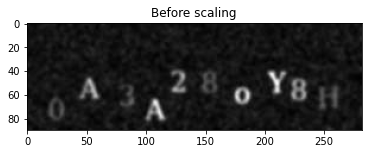

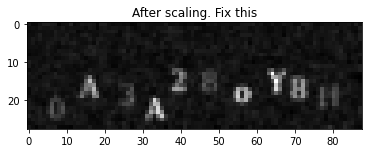


Confidence: 0.36902538
Predicted value: 1


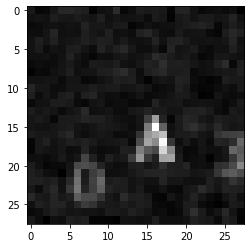


Confidence: 0.4409158
Predicted value: I


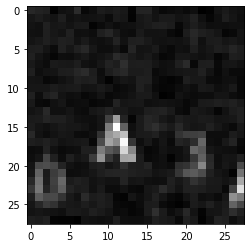


Confidence: 0.42746434
Predicted value: 1


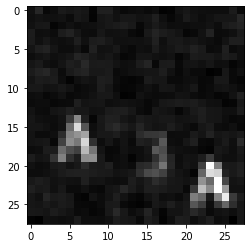


Confidence: 0.48119378
Predicted value: 1


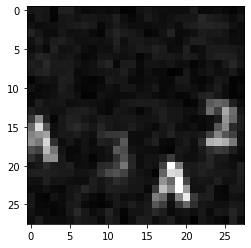


Confidence: 0.36461827
Predicted value: 1


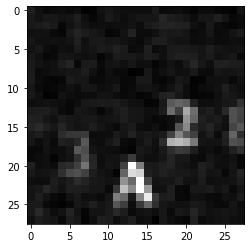


Confidence: 0.34769458
Predicted value: 1


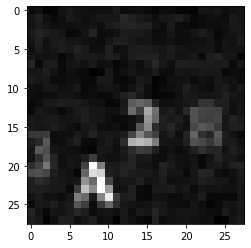


Confidence: 0.4193952
Predicted value: 1


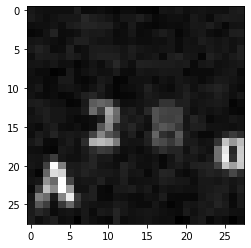


Confidence: 0.52630365
Predicted value: 1


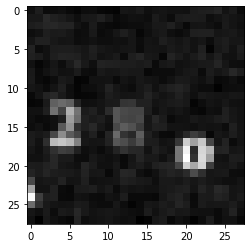


Confidence: 0.50178176
Predicted value: 1


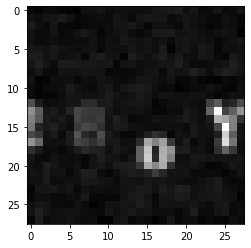


Confidence: 0.46976355
Predicted value: I


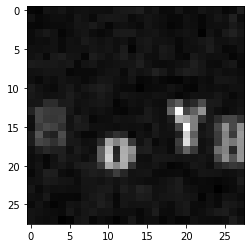


Confidence: 0.39683038
Predicted value: I


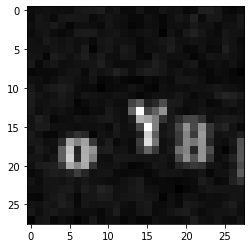


Confidence: 0.3001839
Predicted value: I


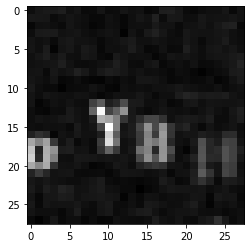

In [9]:
# Easy data

img = cv2.imread("easy_data/0A3A28oY8H.jpg")

# Turn greyscale
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Invert color of image
img = 255 - img

# Scale to 0-1
img = img.astype("float32") / 255

# Morphology. Doesn't help performance as of now
# kernel = np.ones((3, 3),np.uint8)
# img = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)

plt.imshow(img, cmap=plt.get_cmap('gray'))
plt.title("Before scaling")
plt.show()

# Make threshold for darkest color. Doesn't help performance as of now
# img[img < 0.3] = 0

# TODO: Jake, find a way to step through this image with a moving filter at an appropriate size and step size with a 28x28 filter so that all the letters
# in the image are seen by the filter. Then apply the CNN to it (Code provided) and see what it outputs. This is very similar to what I did above but
# these new images require movement vertically, rather than just horizontally, which is what it does now

# Scale image. NOTE: You will likely find you don't need to scale the image until after you find the correct crops and step size for the letters.
# It is obviously way too lowly scaled now. I am just leaving this code here because it breaks down below if not because the size is wrong
ratio = img.shape[1] / img.shape[0]
height = 28  # This remains the same
width = round(height * ratio)
dim = (width, height)
img = cv2.resize(img, dim)

plt.imshow(img, cmap=plt.get_cmap('gray'))
plt.title("After scaling. Fix this")
plt.show()

step_size = 5
width = 28  # This remains the same
for left_boundary in range(0, img.shape[1] - width, step_size):
    right_boundary = left_boundary + width
    img_slice = img[:, left_boundary : right_boundary]

    img_slice_fixed = np.expand_dims(img_slice, -1)
    img_slice_fixed = np.expand_dims(img_slice_fixed, 0)
    
    prediction = model.predict(img_slice_fixed)
    print("\nConfidence:", np.max(prediction))
    decoded_value = hf.decode_prediction(prediction)
    print("Predicted value:", decoded_value)

    plt.imshow(img_slice, cmap=plt.get_cmap('gray'))
    plt.show()

[[242 243 244 ... 242 242 243]
 [242 243 244 ... 242 242 243]
 [243 243 243 ... 242 242 242]
 ...
 [241 241 241 ... 244 244 244]
 [241 241 241 ... 244 244 244]
 [241 241 240 ... 244 244 244]]


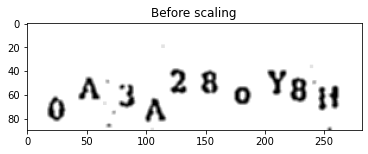

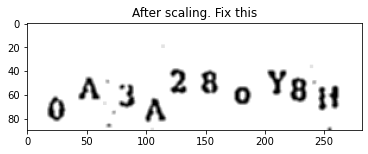

In [260]:
# Easy data Jakes edited version

img = cv2.imread("easy_data/0A3A28oY8H.jpg")

# Turn greyscale
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Invert color of image

img = cv2.fastNlMeansDenoising(img,None,10,3,27) # have to denoise it before dividing by 255
print(img)
img = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,9,2)
img = cv2.blur(img,(3,3)) 
#img = 255 - img

# Scale to 0-1
img = img.astype("float32") / 255

# Morphology. Doesn't help performance as of now
# kernel = np.ones((3, 3),np.uint8)
# img = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)


plt.imshow(img, cmap=plt.get_cmap('gray'))
plt.title("Before scaling")
plt.show()

# Make threshold for darkest color. Doesn't help performance as of now
# img[img < 0.3] = 0

# TODO: Jake, find a way to step through this image with a moving filter at an appropriate size and step size with a 28x28 filter so that all the letters
# in the image are seen by the filter. Then apply the CNN to it (Code provided) and see what it outputs. This is very similar to what I did above but
# these new images require movement vertically, rather than just horizontally, which is what it does now

# Scale image. NOTE: You will likely find you don't need to scale the image until after you find the correct crops and step size for the letters.
# It is obviously way too lowly scaled now. I am just leaving this code here because it breaks down below if not because the size is wrong
ratio = img.shape[1] / img.shape[0]
height = 28  # This remains the same
width = round(height * ratio)
dim = (width, height)
# img = cv2.resize(img, dim)


plt.imshow(img, cmap=plt.get_cmap('gray'))
plt.title("After scaling. Fix this")
plt.show()

#image is 90,282
#going to try and see if we can have a filter that moves from up to down then moves the right and repeats until image has been read
img = img[:,:280]
step_size_horizontal = 10
step_size_vertical = 5
width = 28  # This remains the same


count = 0
for left_boundary in range(0, img.shape[1] - width, step_size_horizontal):
    break
    for top_boundary in range(0, img.shape[0] - height, step_size_vertical):
        bottom_boundary = top_boundary+height
        right_boundary = left_boundary + width
        img_slice = img[top_boundary:bottom_boundary, left_boundary : right_boundary]

        img_slice_fixed = np.expand_dims(img_slice, -1)
        img_slice_fixed = np.expand_dims(img_slice_fixed, 0)
        
        prediction = model.predict(img_slice_fixed)
        if np.max(prediction) < .4:
            continue
        print("\nConfidence:", np.max(prediction))
        decoded_value = hf.decode_prediction(prediction)
        print("Predicted value:", decoded_value)

        plt.imshow(img_slice, cmap=plt.get_cmap('gray'))
        plt.show()
    count+=1
  
    

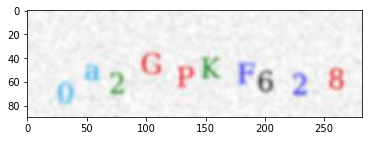


Confidence: 0.9919037
Predicted value: b


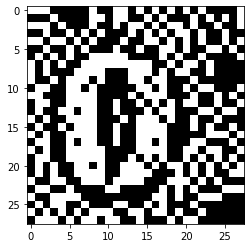


Confidence: 0.99115694
Predicted value: b


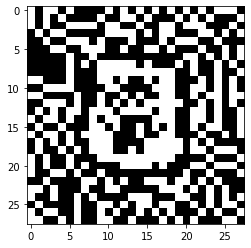


Confidence: 0.9944616
Predicted value: b


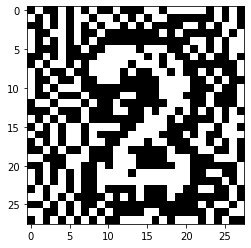


Confidence: 0.99935085
Predicted value: b


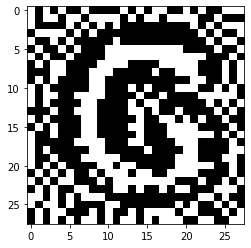


Confidence: 0.99674785
Predicted value: b


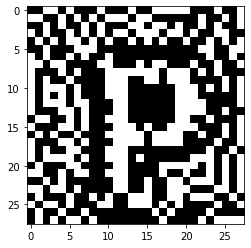

In [510]:
# Using Connected Components on easy data
def consolidate_centroids(centroids,area,distance): #recursive algorithm made that gets rid of duplicates or other nearby centroids within distance
    for i in range(len(centroids)):
        for j in range(len(centroids)):
            if i ==j:
                continue
            point2point = (abs(centroids[i][0]**2 - centroids[j][0]**2) + abs(centroids[i][1]**2 - centroids[j][1]**2))**.5
            if ( point2point< distance)or area[i]<30 or area[i]>1000 :
                #centroids[j] = [  np.mean([ centroids[i][0],centroids[j][0]]), np.mean([ centroids[i][1],centroids[j][1]]) ]
                final_centroids = np.delete(centroids,(i),0)
                areas.pop(i)
                final_centroids = consolidate_centroids(final_centroids,areas,distance)
                return final_centroids
    return centroids          

img_color= cv2.imread("easy_data/0a2GPKF628.jpg")
plt.imshow(img_color, cmap=plt.get_cmap('gray'))
plt.show()

# Turn greyscale
img = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY)
img = img[:,:280]

#Denoising and filtering for model reading
img_model = cv2.fastNlMeansDenoising(img,None,10,3,27) # have to denoise it before dividing by 255
#img_model = cv2.adaptiveThreshold(img_model,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,7,1)
# plt.imshow(img_model, cmap=plt.get_cmap('gray'))
# plt.show()

#Denoising and threshing for connected components
img_thresh = cv2.fastNlMeansDenoising(img,None,10,3,27) # have to denoise it before dividing by 255
img_thresh = cv2.adaptiveThreshold(img_thresh,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,7,3)
_,img_thresh = cv2.threshold(img_thresh,240,255, cv2.THRESH_BINARY_INV)


num_labels,labels,stats,centroids = cv2.connectedComponentsWithStats(img_thresh, 4, cv2.CV_32S) #connected components function

#returns areas for connected components stats variable
areas = []
for i in stats:
    areas.append(i[4])

dst_tolerance = 25#tolerance for nearby points
real_centroids = consolidate_centroids(centroids,areas,dst_tolerance)

# converts centroids to tuples for drawing markers then sorts
tup_centroids = []
for i in range(len(real_centroids)): 
    tup_centroids.append( (int(real_centroids[i][0]), int(real_centroids[i][1])) )
tup_centroids.sort(key = lambda x:x[0])

#draws markers
for i in range(len(tup_centroids)):
    cv2.drawMarker(img_thresh,tup_centroids[i],[0,0,255])
# plt.imshow(img_thresh, cmap=plt.get_cmap('gray'))
# plt.show()

for i in range(len(tup_centroids)):
    img_slice = img_model[tup_centroids[i][1]-14:tup_centroids[i][1]+14,tup_centroids[i][0]-14:tup_centroids[i][0]+14]

    kernel = np.array([[0, -1, 0],
                    [-1, 5,-1],
                    [0, -1, 0]])
    for i in range(2):
        img_slice = cv2.filter2D(src=img_slice, ddepth=-1, kernel=kernel)
    img_slice = cv2.adaptiveThreshold(img_slice,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,7,1)

    #_,img_slice = cv2.threshold(img_slice,220,255,cv2.THRESH_BINARY)

    #_,img_slice = cv2.threshold(img_slice,180,255,cv2.THRESH_BINARY)
    #img_slice = cv2.morphologyEx(img_slice,cv2.MORPH_OPEN,np.ones(3))
    #img_slice = cv2.blur(img_slice,(3,3)) #blur image

    # _,img_slice = cv2.ada(img_slice,150,255, cv2.THRESH_BINARY)

    #image sharpening
    img_slice=255-img_slice
   

    img_slice = img_slice.astype("float32") / 255

    img_slice_fixed = np.expand_dims(img_slice, -1)
    img_slice_fixed = np.expand_dims(img_slice_fixed, 0)
    prediction = model.predict(img_slice_fixed)
    print("\nConfidence:", np.max(prediction))
    decoded_value = hf.decode_prediction(prediction)
    print("Predicted value:", decoded_value)
    plt.imshow(img_slice, cmap=plt.get_cmap('gray'))
    plt.show()
